In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from visualize_clf import visualize_clf
from plot3d import plot3d
from prepare import prepare_data

In [40]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)


In [41]:
dataset = pd.read_csv('virus_data.csv')
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=114)
my_data = prepare_data(train_df, train_df)


In [42]:
dataset.shape

(1250, 25)

In [43]:
dataset['conversations_per_day'].value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

In [44]:
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=114)

In [45]:
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()
print(missing_values_train)
print(missing_values_test)

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         87
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64
patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         22
conversations_per_day     0
sugar_l

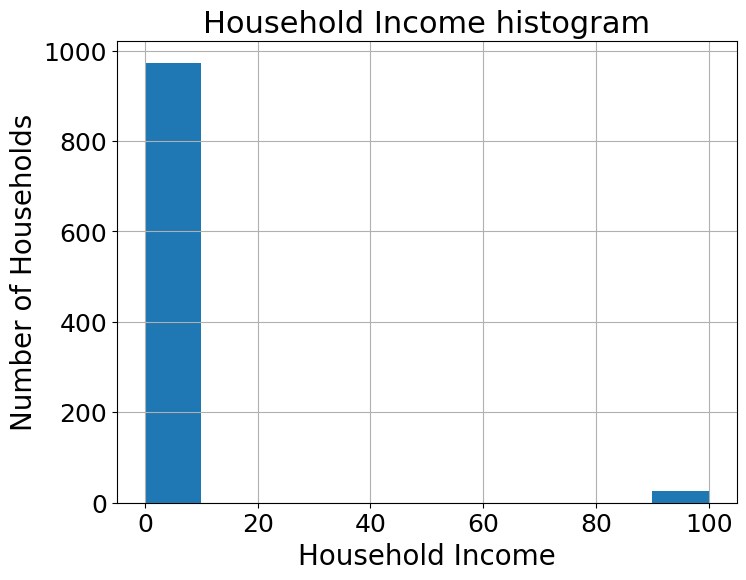

<AxesSubplot:xlabel='household_income', ylabel='Count'>

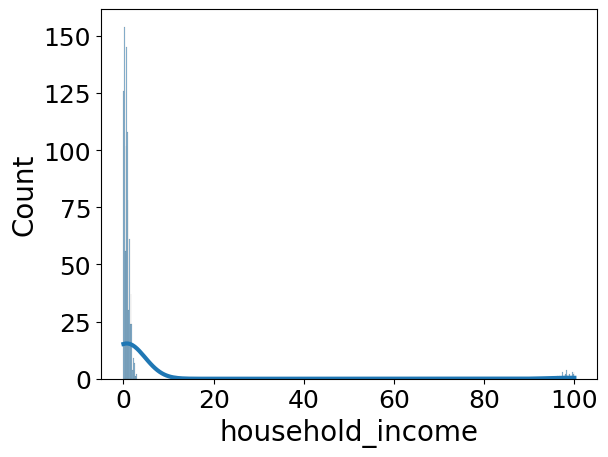

In [60]:
household_income = train_df['household_income']
plt.figure(figsize=(8, 6))
household_income.plot(kind='hist')
plt.title('Household Income histogram')
plt.xlabel('Household Income')
plt.ylabel('Number of Households')
plt.xticks(rotation=0)
plt.grid()
plt.show()

sns.histplot(data=train_df, x='household_income', line_kws={"linewidth": 3}, 
                 kde=True)

In [47]:
train_mean = train_df['household_income'].mean()
train_median = train_df['household_income'].median()
test_mean = test_df['household_income'].mean()
test_median = test_df['household_income'].median()
train_df['household_income'].fillna(train_median,inplace = True)
test_df['household_income'].fillna(test_median,inplace = True)

C:\Users\nirhe\AppData\Local\Temp\ipykernel_22544\1719613447.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['household_income'].fillna(test_median,inplace = True)


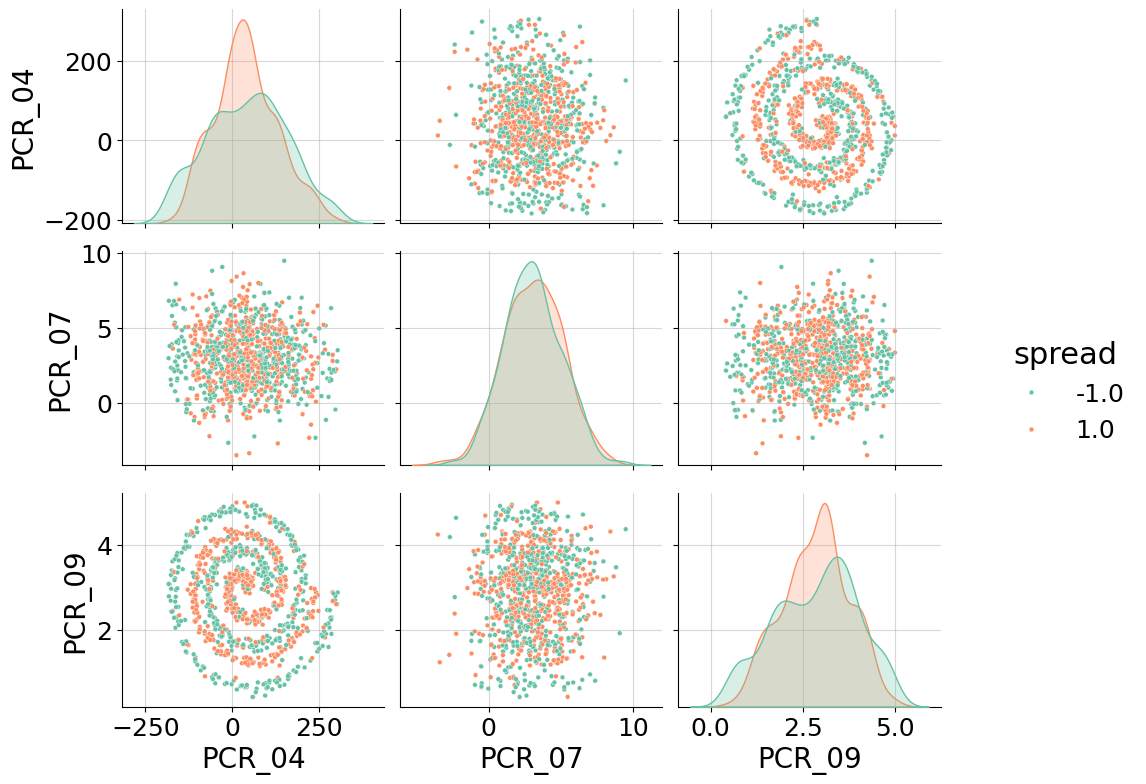

In [48]:
#train_df['spread'] = train_df[['PCR_04', 'PCR_07', 'PCR_09']].std(axis=1)
g = sns.pairplot(train_df, vars=['PCR_04', 'PCR_07', 'PCR_09'], hue='spread', plot_kws={"s":12}, palette="Set2")

#g.fig.suptitle("TODO", y=1.04)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)

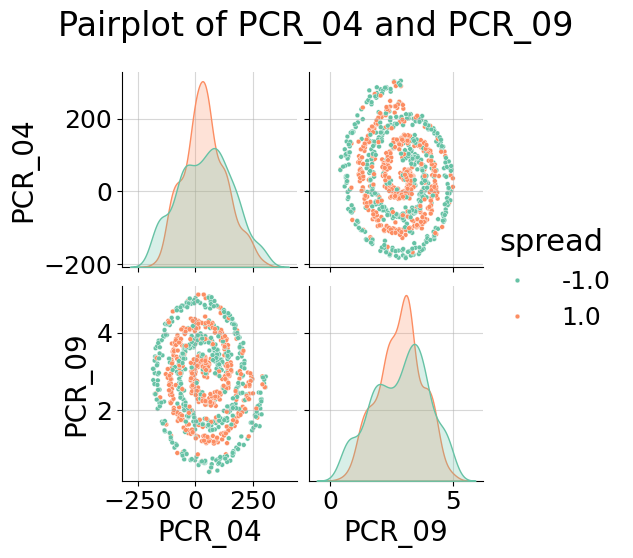

In [49]:
g = sns.pairplot(train_df, vars=['PCR_04', 'PCR_09'], hue='spread', plot_kws={"s":12}, palette="Set2")
g.fig.suptitle('Pairplot of PCR_04 and PCR_09', y=1.1)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

**KNN Implemantation**

In [50]:
#task C
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
       self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        return self

    def predict(self, X):
	# Note: You can use self.n_neighbors here
        predictions = None
        # TODO: compute the predicted labels (+1 or -1)
        dists = cdist(X, self.X_train)
        knn_indices = np.argpartition(dists, self.n_neighbors, axis=1)[:, :self.n_neighbors]
        knn_labels =  self.y_train[knn_indices]
        predictions = np.sign(np.mean(knn_labels, axis=1))
        return predictions


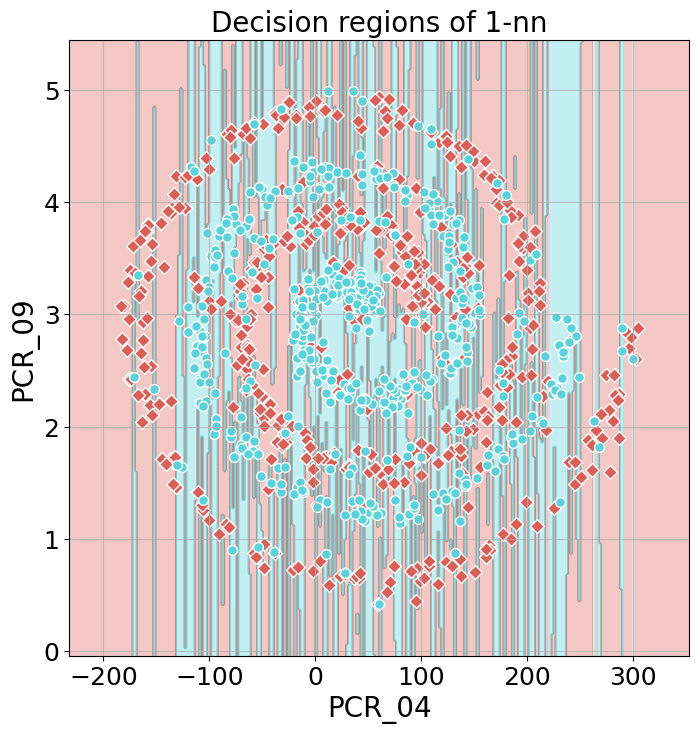

train accuracy is: 1.000000
test accuracy is: 0.624000


In [51]:
#Q10
temp_df = train_df[['PCR_04', 'PCR_09']]
knn_model = kNN(1)
knn_model.fit(temp_df, train_df['spread'])
visualize_clf(knn_model, temp_df, train_df['spread'], 'Decision regions of 1-nn', 'PCR_04', 'PCR_09')
print("train accuracy is: %f"%knn_model.score(temp_df, train_df['spread']))
temp_test = test_df[['PCR_04', 'PCR_09']]
predictions = knn_model.predict(temp_test)
print("test accuracy is: %f"%knn_model.score(temp_test, test_df['spread']))

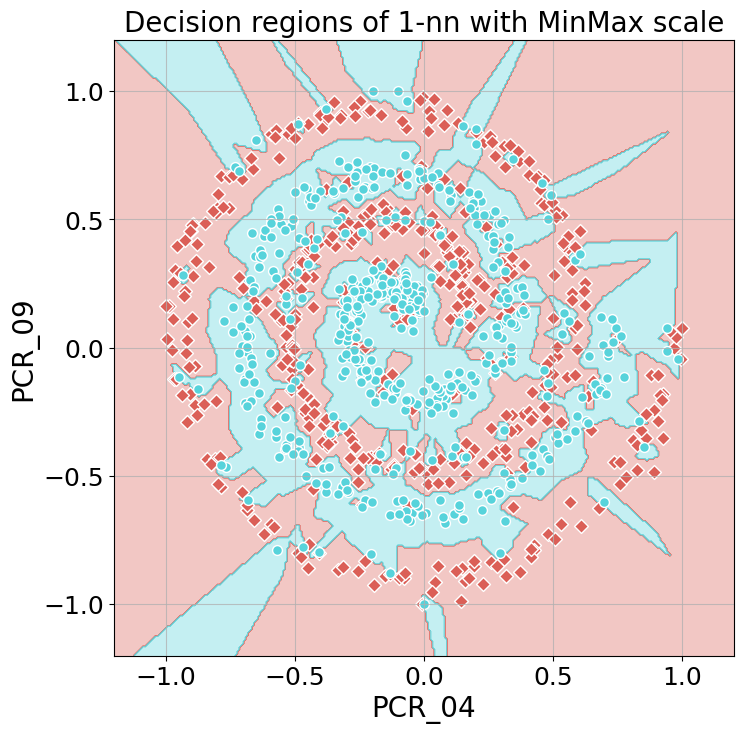

train accuracy is: 1.000000
test accuracy is: 0.740000


In [52]:
#Q11
scalar = MinMaxScaler(feature_range=(-1,1))
scaled_df = scalar.fit_transform(temp_df)
normalized_knn = kNN(1)
normalized_knn.fit(scaled_df, train_df['spread'])
visualize_clf(normalized_knn, scaled_df, train_df['spread'], 'Decision regions of 1-nn with MinMax scale', 'PCR_04', 'PCR_09')
print("train accuracy is: %f"%normalized_knn.score(scaled_df, train_df['spread']))
scaled_test = scalar.fit_transform(temp_test)
preds = normalized_knn.predict(scaled_test)
print("test accuracy is: %f"%normalized_knn.score(scaled_test, test_df['spread']))

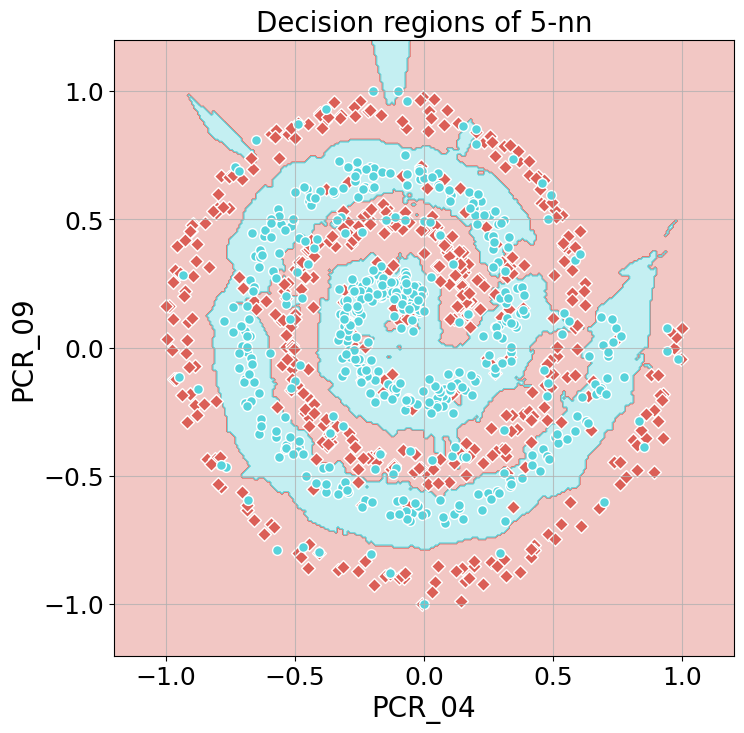

train accuracy is: 0.846000
test accuracy is: 0.808000


In [53]:
#Q12
normalized_5nn = kNN(5)
normalized_5nn.fit(scaled_df, train_df['spread'])
visualize_clf(normalized_5nn, scaled_df, train_df['spread'], 'Decision regions of 5-nn', 'PCR_04', 'PCR_09')
print("train accuracy is: %f"%normalized_5nn.score(scaled_df, train_df['spread']))
scaled_test = scalar.fit_transform(temp_test)
preds = normalized_5nn.predict(scaled_test)
print("test accuracy is: %f"%normalized_5nn.score(scaled_test, test_df['spread']))

In [54]:
#task E
df = pd.read_csv('virus_data.csv')
df['specialProperty'] = df['blood_type'].isin(['O+', 'B+'])
df = df.drop('blood_type', axis=1)
train, test = train_test_split(df, test_size=0.2, random_state=114)
print(train['specialProperty'])

1003    False
1186    False
299     False
628     False
812     False
        ...  
104      True
850     False
594     False
787      True
586      True
Name: specialProperty, Length: 1000, dtype: bool


['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']


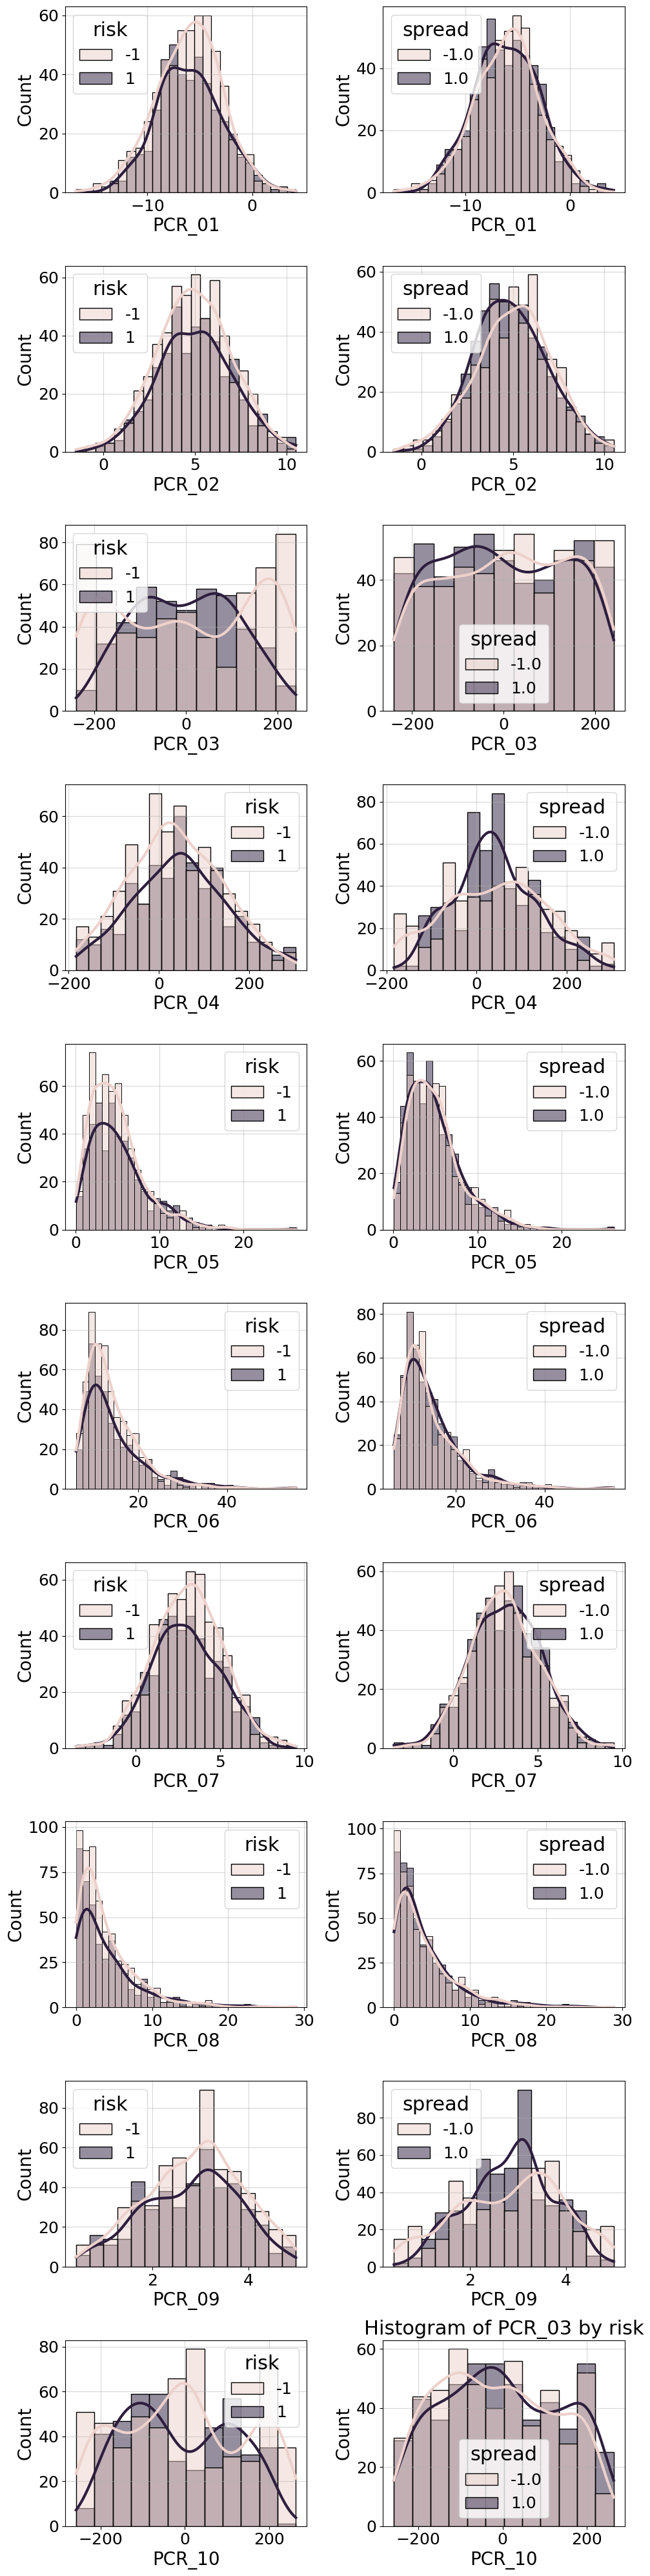

In [55]:
# Univariate Analysis
COL_NAME = train.columns
COL_NAME = [col for col in COL_NAME if col.startswith('PCR')]
#COL_NAME = ['num_of_siblings']
#COL_NAME = ['PCR_03']
print(COL_NAME)
COLS, ROWS = (2, len(COL_NAME))

plt.figure(figsize=(5 * COLS, 4 * ROWS)) 
for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
        
    isContinuous = "float" in train[column].dtype.name
    sns.histplot(data=train, x=column, hue=cls, line_kws={"linewidth": 3}, 
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)
plt.title('Histogram of PCR_03 by risk')
plt.tight_layout()


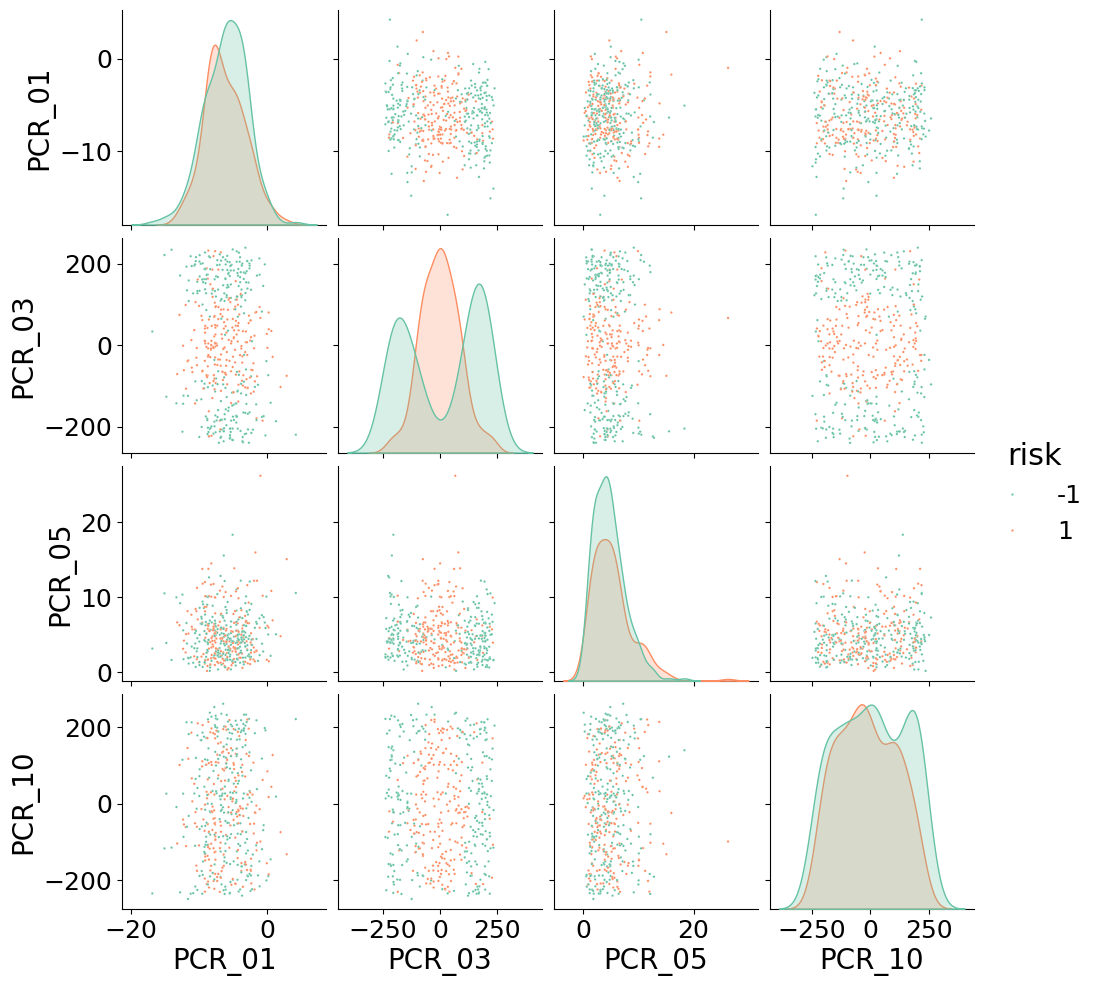

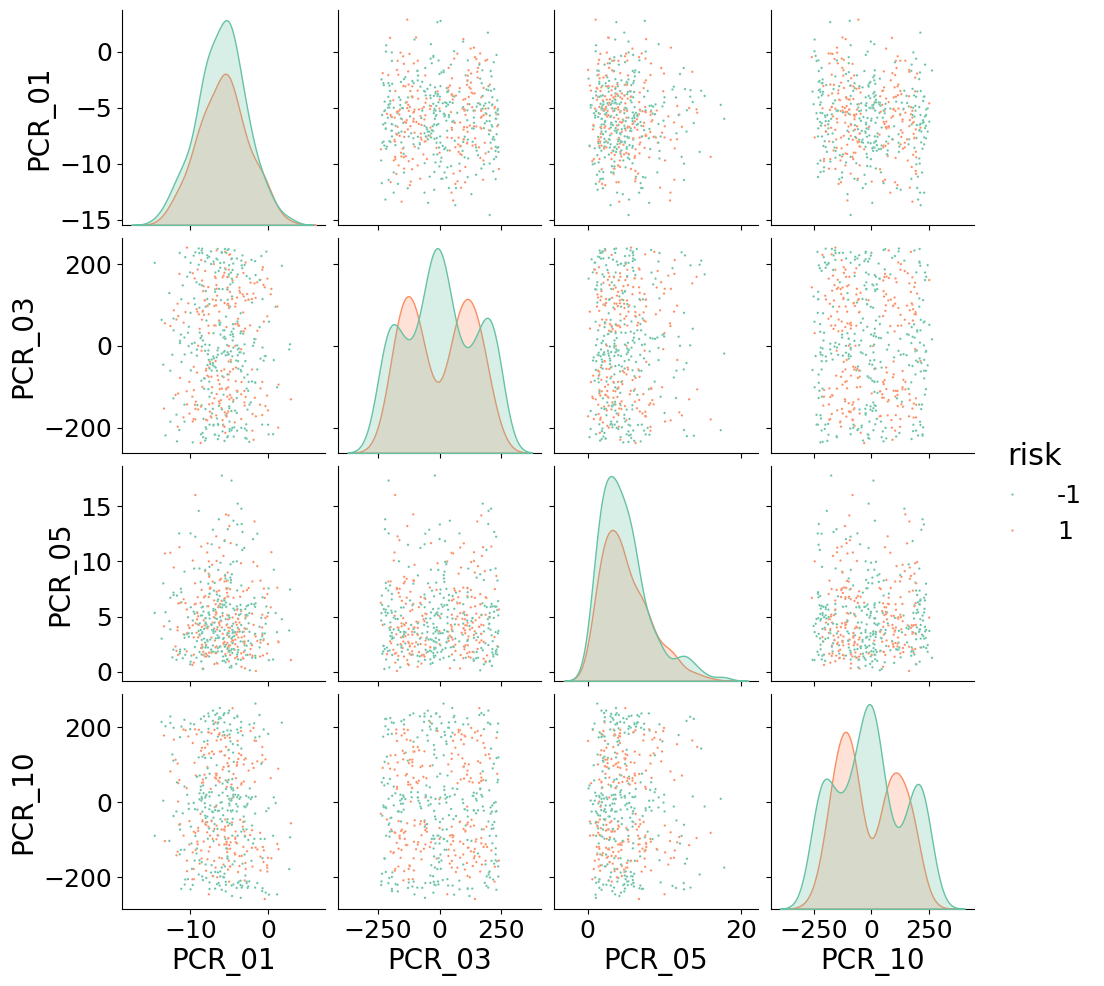

In [56]:
#Q16
train_special = train[train['specialProperty']]
train_not_special = train[~train['specialProperty']]
sns.pairplot(train_special, vars=['PCR_01', 'PCR_03', 'PCR_05', 'PCR_10'], plot_kws={"s": 3}, hue="risk", palette="Set2")
sns.pairplot(train_not_special, vars=['PCR_01', 'PCR_03', 'PCR_05', 'PCR_10'], plot_kws={"s": 3}, hue="risk", palette="Set2")


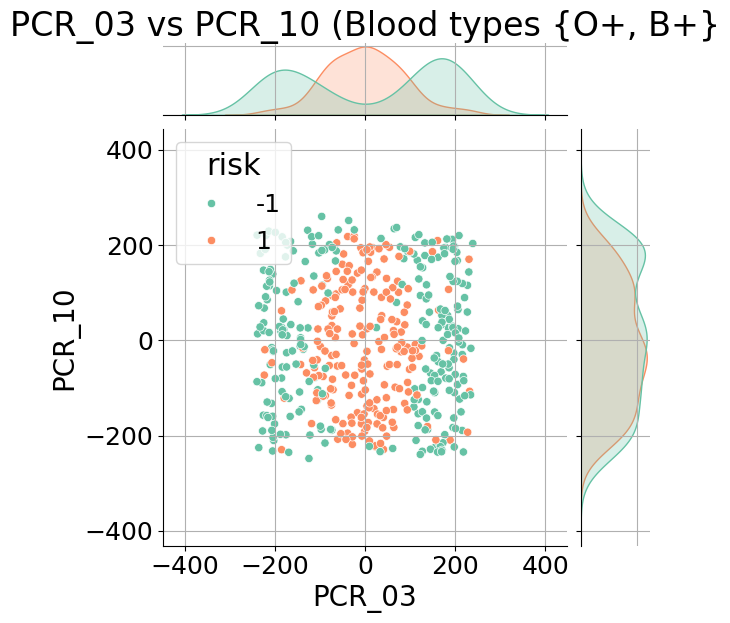

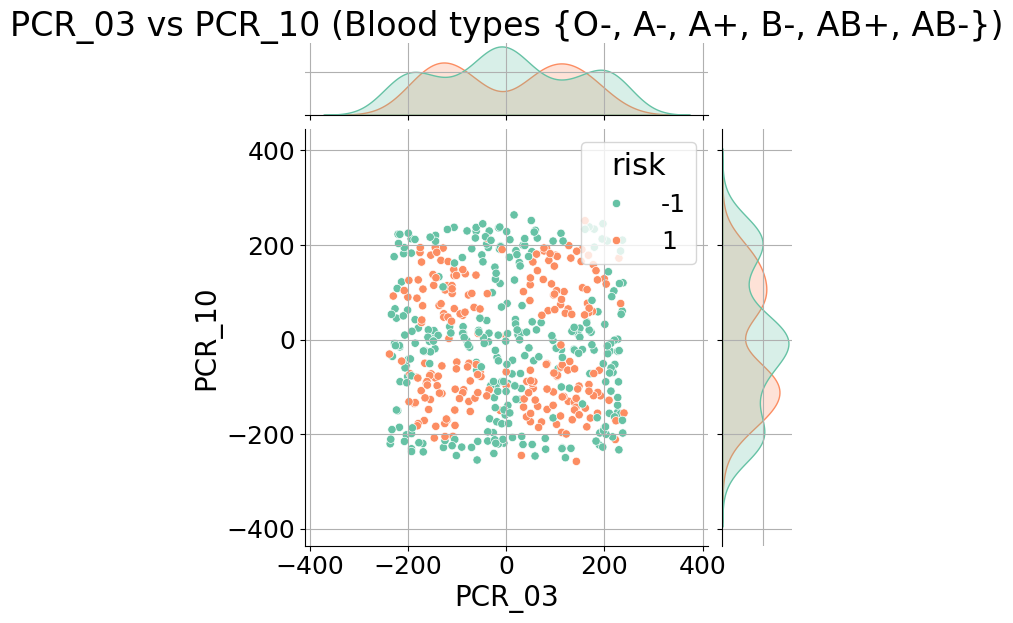

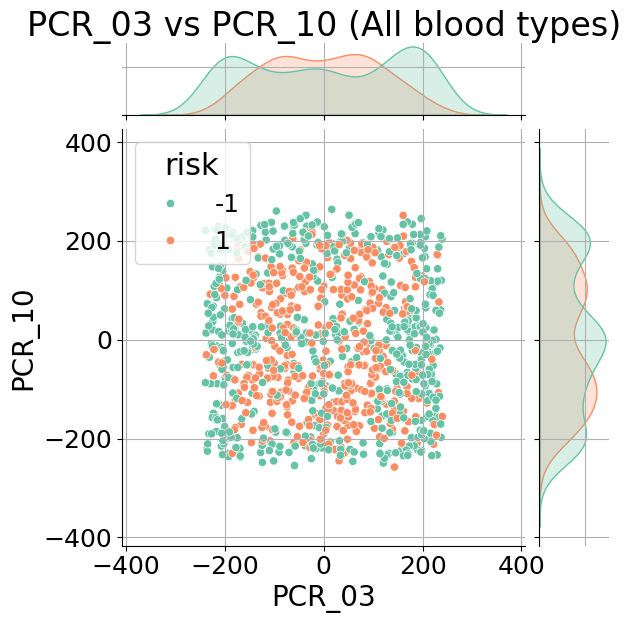

In [57]:
#Q17
special_plot = sns.jointplot(train_special, x='PCR_03', y='PCR_10', hue='risk', palette='Set2')
plt.suptitle('PCR_03 vs PCR_10 (Blood types {O+, B+}', y=1.03)
special_plot.ax_joint.grid(True)
special_plot.ax_marg_x.grid(True)
special_plot.ax_marg_y.grid(True)
not_special_plot = sns.jointplot(train_not_special, x='PCR_03', y='PCR_10', hue='risk', palette='Set2')
plt.suptitle('PCR_03 vs PCR_10 (Blood types {O-, A-, A+, B-, AB+, AB-})', y=1.03)
not_special_plot.ax_joint.grid(True)
not_special_plot.ax_marg_x.grid(True)
not_special_plot.ax_marg_y.grid(True)
plot = sns.jointplot(train, x='PCR_03', y='PCR_10', hue='risk', palette='Set2')
plt.suptitle('PCR_03 vs PCR_10 (All blood types)', y=1.03)
plot.ax_joint.grid(True)
plot.ax_marg_x.grid(True)
plot.ax_marg_y.grid(True)

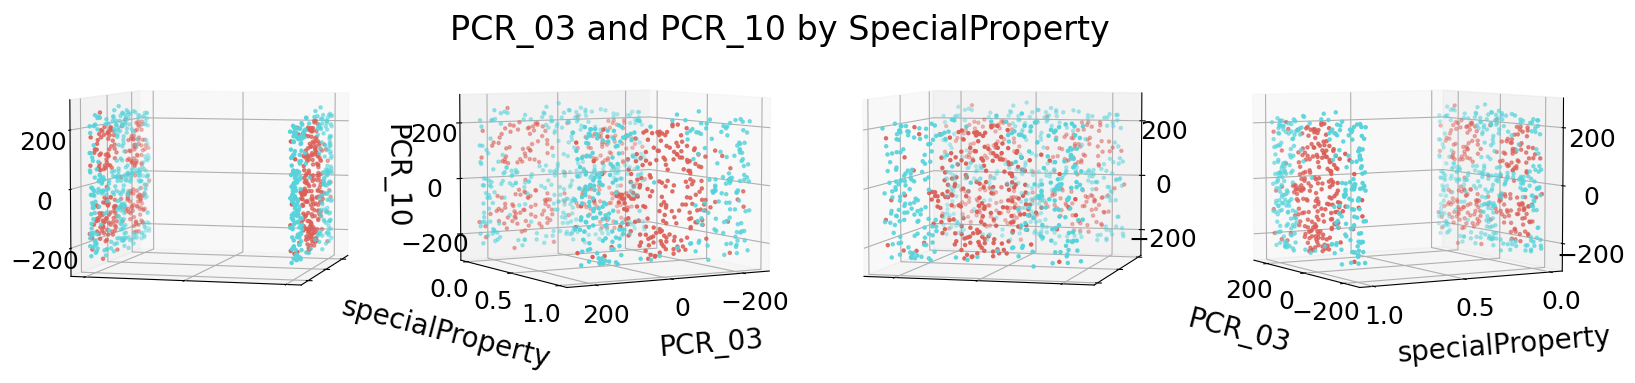

In [58]:
#Q18
plot3d(train, "PCR_03", "specialProperty", "PCR_10", title="PCR_03 and PCR_10 by SpecialProperty", hue="risk", s=5)

In [59]:
#Task F
"""
normalize 3 and 10 by min max and the other by standard
use dataframes: train, test
"""

train_scaled = train.copy()
test_scaled = test.copy()

min_max_scale = ['PCR_03', 'PCR_10']
scalar = MinMaxScaler(feature_range=(-1,1))
train_scaled[min_max_scale] = scalar.fit_transform(train_scaled[min_max_scale])
test_scaled[min_max_scale] = scalar.fit_transform(test_scaled[min_max_scale])




# Initialize the StandardScaler
scaler = StandardScaler()

# Columns to be normalized
columns_to_normalize = ['PCR_01','PCR_02','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09']

# Fit and transform the data
train_scaled[columns_to_normalize] = scaler.fit_transform(train_scaled[columns_to_normalize])
test_scaled[columns_to_normalize] = scaler.fit_transform(test_scaled[columns_to_normalize])

dataset.shape()
##

TypeError: 'tuple' object is not callable

In [6]:
def prepare_data(training_data, new_data):
    #fill 'housold income'
    my_data = new_data.copy()
    train_median = training_data['household_income'].median()
    my_data['household_income'].fillna(train_median,inplace = True)
    my_data['specialProperty'] = my_data['blood_type'].isin(['O+', 'B+'])
    my_data = my_data.drop('blood_type', axis=1)
    min_max_scale = ['PCR_03', 'PCR_10']
    for column in min_max_scale:
        maxval = training_data[column].max()
        minval = training_data[column].min()
        my_data[column] = -1 + (my_data[column] - minval) * (1 - (-1)) / (maxval - minval)
    standard_scale = ['PCR_01','PCR_02','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09']
    for column in standard_scale:
        average = training_data[column].mean()
        std = training_data[column].std()
        my_data[column] = (my_data[column] - average)/std
    return my_data
dataset = pd.read_csv('virus_data.csv')
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=114)
my_data = prepare_data(train_df, train_df)
my_data.to_csv("train.csv", index=False)
my_data = prepare_data(train_df, test_df)
my_data.to_csv("test.csv", index=False)

C:\Users\nirhe\AppData\Local\Temp\ipykernel_10340\2969490893.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_data['household_income'].fillna(train_median,inplace = True)
C:\Users\nirhe\AppData\Local\Temp\ipykernel_10340\2969490893.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a